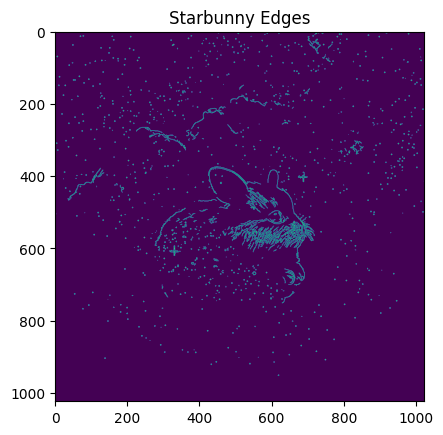

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('starbunnyy.jpg', cv2.IMREAD_GRAYSCALE)

# Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Displaying Starbunny Edges
plt.imshow(edges)
plt.title('Starbunny Edges')
plt.show()

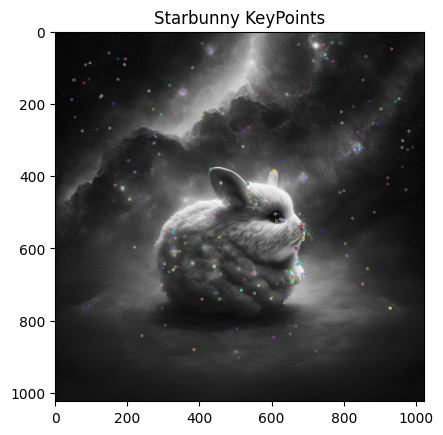

In [2]:
# Using ORB (Oriented FAST and Rotated BRIEF) to detect keypoints
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

# Drawing keypoints
image_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Displaying Keypoints after Drawing
plt.imshow(image_keypoints)
plt.title('Starbunny KeyPoints')
plt.show()

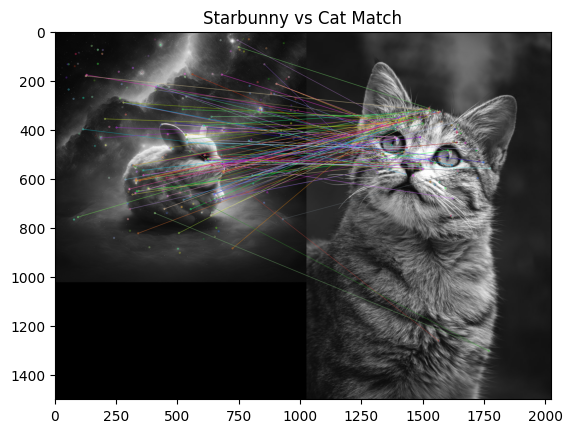

In [3]:
# Load a second image
image2 = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and descriptors for the second image
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Using BFMatcher (Brute Force Matcher) to match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, descriptors2)

image_matches = cv2.drawMatches(image, keypoints, image2, keypoints2, matches, None)
plt.imshow(image_matches)
plt.title('Starbunny vs Cat Match')
plt.show()

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load a pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False)

# Preprocess the image
img = image.load_img('starbunnyy.jpg', target_size=(1024, 1024))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the features from this block
features = base_model.predict(img_array)

1/1 [==============================] - 2s 2s/step


In [6]:
features.shape

(1, 32, 32, 512)

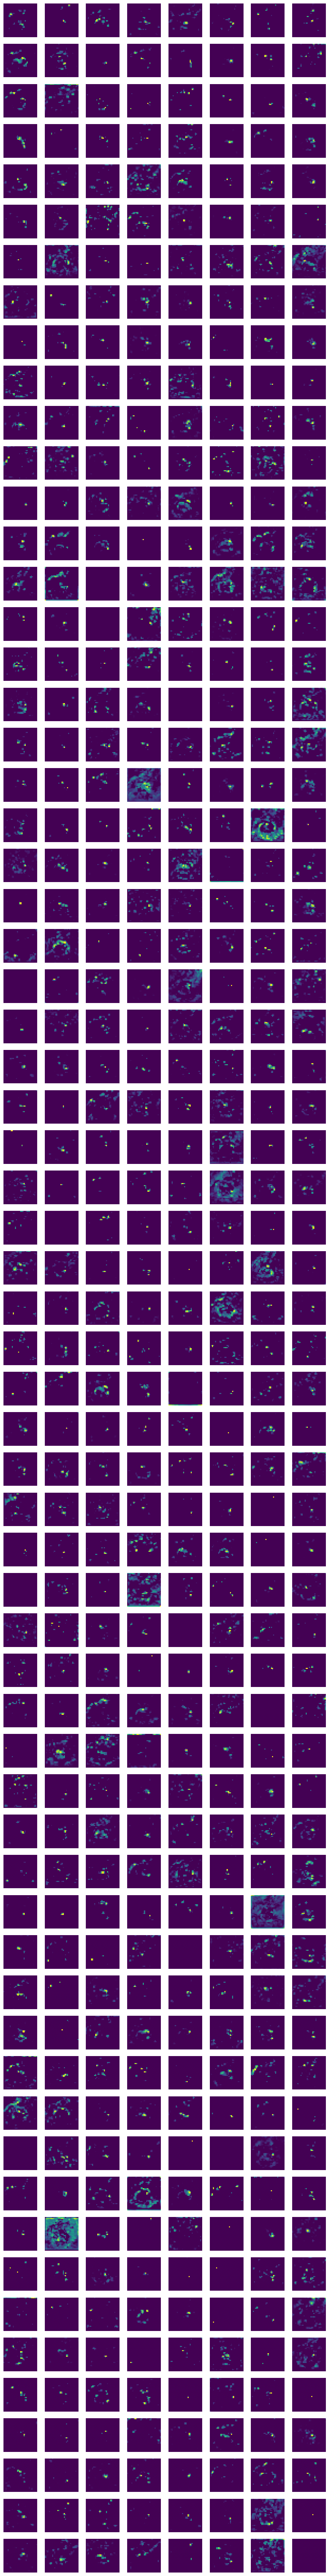

In [7]:

# Number of features in the feature map
num_features = features.shape[-1]

# Set the number of columns for your subplot grid
n_cols = 8
n_rows = num_features // n_cols

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*1.5, n_rows*1.5))

for i in range(num_features):
    ax = axes[i // n_cols, i % n_cols]
    feature_map = features[0, :, :, i]
    ax.imshow(feature_map, cmap='viridis')
    ax.axis('off')

plt.show()
